In [1]:
# Car Price Prediction - Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

# Load Dataset
df = pd.read_csv('used_cars.csv')

In [3]:

# Basic visualization of the dataset
print("First 5 rows of the dataset:")
df.head(6)


First 5 rows of the dataset:


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"


In [4]:
df.shape

(4009, 12)

In [5]:
print(" Dataset Info")
print(df.info())

 Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB
None


In [6]:
print("Missing Values")
df.isnull().sum()


Missing Values


brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [7]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [8]:
print("\nUnique values per column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Unique values per column:

brand: 57
model: 1898
model_year: 34
milage: 2818
fuel_type: 7
engine: 1146
transmission: 62
ext_col: 319
int_col: 156
accident: 2
clean_title: 1
price: 1569


In [9]:
df['brand'].value_counts()

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Subaru            64
Acura             64
Mazda             64
Honda             63
INFINITI          59
Volkswagen        59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Genesis           20
Mitsubishi        20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
Scion              6
McLaren            6
Saturn             5
FIAT               5
Lotus              4
Lucid  

In [10]:
df['model'].value_counts()

model
M3 Base               30
F-150 XLT             24
Corvette Base         22
1500 Laramie          18
Model Y Long Range    17
                      ..
Cascada Base           1
4Runner Venture        1
Passat 2.5 SE          1
Q5 40 Premium          1
Protege DX             1
Name: count, Length: 1898, dtype: int64

In [11]:
df['milage'].value_counts()

milage
110,000 mi.    16
45,000 mi.     15
55,000 mi.     13
120,000 mi.    13
40,000 mi.     12
               ..
81,880 mi.      1
52,750 mi.      1
300,183 mi.     1
35,035 mi.      1
34,742 mi.      1
Name: count, Length: 2818, dtype: int64

In [12]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [13]:
df['accident'].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [14]:
df['clean_title'].value_counts()

clean_title
Yes    3413
Name: count, dtype: int64

In [15]:
df['ext_col'].value_counts()


ext_col
Black                       905
White                       816
Gray                        496
Silver                      374
Blue                        349
                           ... 
Quicksilver Metallic          1
Dark Sapphire                 1
Carbon Black Metallic         1
Sunset Drift Chromaflair      1
Magnetic Gray Clearcoat       1
Name: count, Length: 319, dtype: int64

In [16]:
df['int_col'].value_counts()


int_col
Black                   2025
Beige                    538
Gray                     472
Brown                    157
–                        133
                        ... 
Gray w/Blue Bolsters       1
Very Light Cashmere        1
Black / Gray               1
Deep Chestnut              1
Black / Graphite           1
Name: count, Length: 156, dtype: int64

In [17]:
df.isin(['–']).sum()

brand             0
model             0
model_year        0
milage            0
fuel_type        45
engine           45
transmission      4
ext_col          15
int_col         133
accident          0
clean_title       0
price             0
dtype: int64

In [39]:
# fill - values in 'fuel_type' and 'int_col' with mode
# Use the actual Unicode en-dash directly (U+2013)
en_dash = '–'

# Replace en-dash with NaN only in relevant columns
df['fuel_type'] = df['fuel_type'].replace(en_dash, np.nan)
df['int_col'] = df['int_col'].replace(en_dash, np.nan)

# Now fill with mode
for col in ['fuel_type', 'int_col']:
    df[col].fillna(df[col].mode()[0])


In [40]:
print(df[['fuel_type', 'int_col']].isin([en_dash]).sum())

fuel_type    0
int_col      0
dtype: int64


In [19]:
# Clean 'price' and 'milage' columns
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['milage'] = df['milage'].replace('[\,| mi.]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\,'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\,'
C:\Users\mukund gupta\AppData\Local\Temp\ipykernel_7720\3206249035.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\mukund gupta\AppData\Local\Temp\ipykernel_7720\3206249035.py:3: SyntaxWarning: invalid escape sequence '\,'
  df['milage'] = df['milage'].replace('[\,| mi.]', '', regex=True).astype(float)


In [41]:
# Fill missing categorical values with 'Unknown'
for col in ['fuel_type', 'accident', 'clean_title']:
    df[col] = df[col].fillna('Unknown')

In [21]:
# Extract numeric engine size
df['engine_size'] = df['engine'].str.extract(r'(\d+\.?\d*)').astype(float)

In [22]:
# Create new features
df['car_age'] = 2025 - df['model_year']

In [23]:
top_models = df['model'].value_counts().nlargest(20).index
df['model'] = df['model'].apply(lambda x: x if x in top_models else 'Other')

In [24]:
top_ext_colors = df['ext_col'].value_counts().nlargest(5).index
df['ext_col'] = df['ext_col'].apply(lambda x: x if x in top_ext_colors else 'Other')


In [42]:

top_int_colors = df['int_col'].value_counts().nlargest(5).index
df['int_col'] = df['int_col'].apply(lambda x: x if x in top_int_colors else 'Other')


In [26]:
print("\n--- Summary Statistics ---")
print(df.describe())


--- Summary Statistics ---
        model_year         milage         price  engine_size      car_age
count  4009.000000    4009.000000  4.009000e+03  3931.000000  4009.000000
mean   2015.515590   64717.551010  4.455319e+04   271.122005     9.484410
std       6.104816   52296.599459  7.871064e+04   168.878346     6.104816
min    1974.000000     100.000000  2.000000e+03     1.200000     1.000000
25%    2012.000000   23044.000000  1.720000e+04   178.500000     5.000000
50%    2017.000000   52775.000000  3.100000e+04   290.000000     8.000000
75%    2020.000000   94100.000000  4.999000e+04   382.000000    13.000000
max    2024.000000  405000.000000  2.954083e+06  1020.000000    51.000000


In [43]:
print("\n--- Categorical Columns Summary ---")
print(df.describe(include=['object']))


--- Categorical Columns Summary ---
       brand  model fuel_type transmission ext_col int_col       accident  \
count   4009   4009      4009         4009    4009    4009           4009   
unique    57     21         6           62       6       5              3   
top     Ford  Other  Gasoline          A/T   Other   Black  None reported   
freq     386   3687      3524         1037    1069    2158           2910   

       clean_title  
count         4009  
unique           2  
top            Yes  
freq          3413  


In [28]:
df.drop(columns=['engine', 'model_year'], inplace=True)

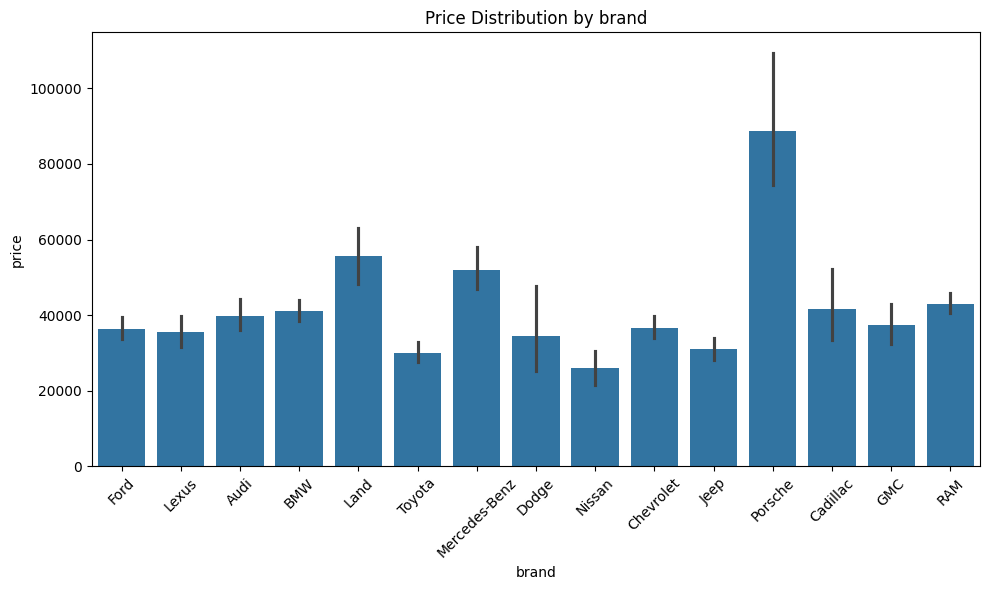

In [30]:
plt.figure(figsize=(10, 6))
top_brand = df['brand'].value_counts().head(15).index  # Limit to top 15 Manufacture
sns.barplot(data=df[df['brand'].isin(top_brand)], x='brand', y='price')
plt.xticks(rotation=45)
plt.title("Price Distribution by brand")
plt.tight_layout()
plt.show()

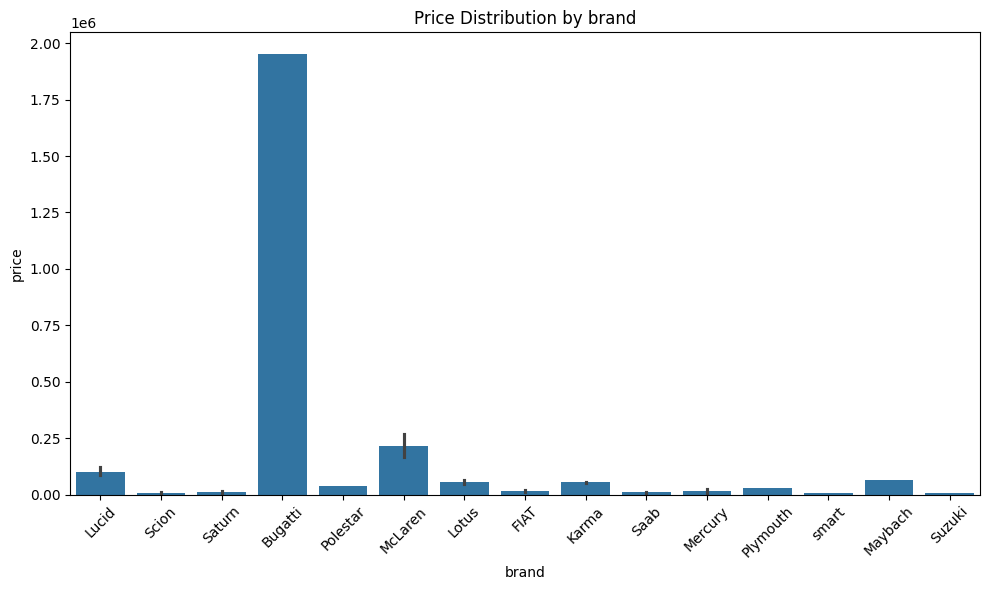

In [31]:
plt.figure(figsize=(10, 6))
top_brand = df['brand'].value_counts().tail(15).index  # Limit to lowest 15 Manufacture
sns.barplot(data=df[df['brand'].isin(top_brand)], x='brand', y='price')
plt.xticks(rotation=45)
plt.title("Price Distribution by brand")
plt.tight_layout()
plt.show()

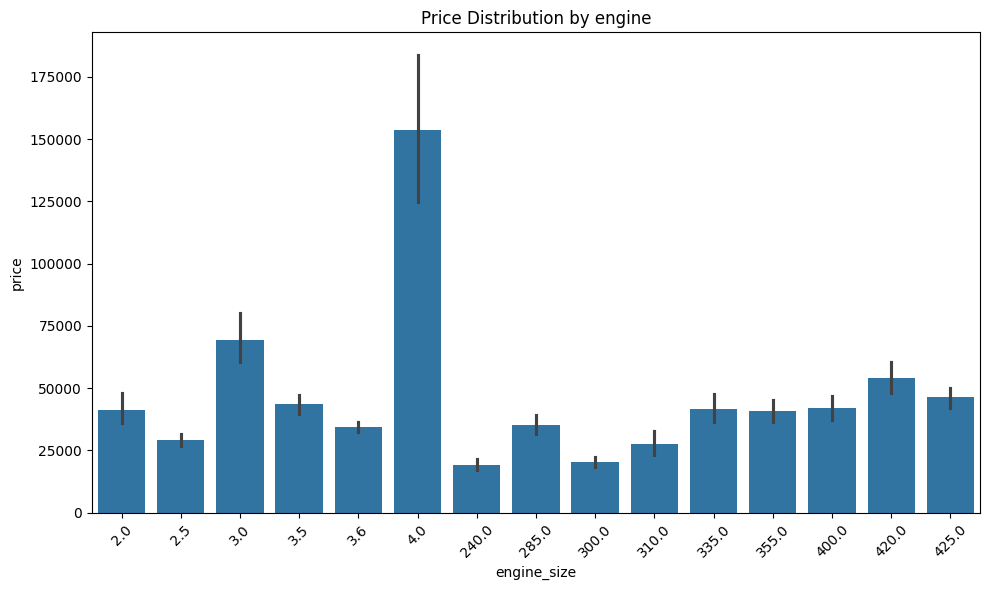

In [32]:
plt.figure(figsize=(10, 6))
top_engine = df['engine_size'].value_counts().head(15).index  # Limit to top 15 Manufacture
sns.barplot(data=df[df['engine_size'].isin(top_engine)], x='engine_size', y='price')
plt.xticks(rotation=45)
plt.title("Price Distribution by engine")
plt.tight_layout()
plt.show()

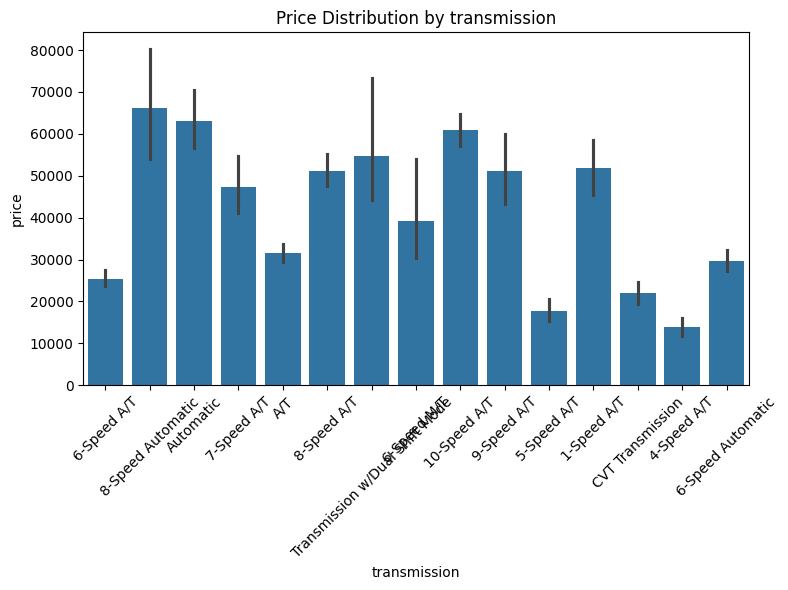

In [33]:
plt.figure(figsize=(8, 6))
top_transmission = df['transmission'].value_counts().head(15).index  # Limit to top 15 transmission 
sns.barplot(data=df[df['transmission'].isin(top_transmission)], x='transmission', y='price')
plt.xticks(rotation=45)
plt.title("Price Distribution by transmission")
plt.tight_layout()
plt.show()

In [44]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)



Categorical columns: ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
Numerical columns: ['milage', 'price', 'engine_size', 'car_age']


In [45]:
exclude_cols = ['brand','model','transmission']
categorical_cols  = [col for col in categorical_cols  if col not in exclude_cols]

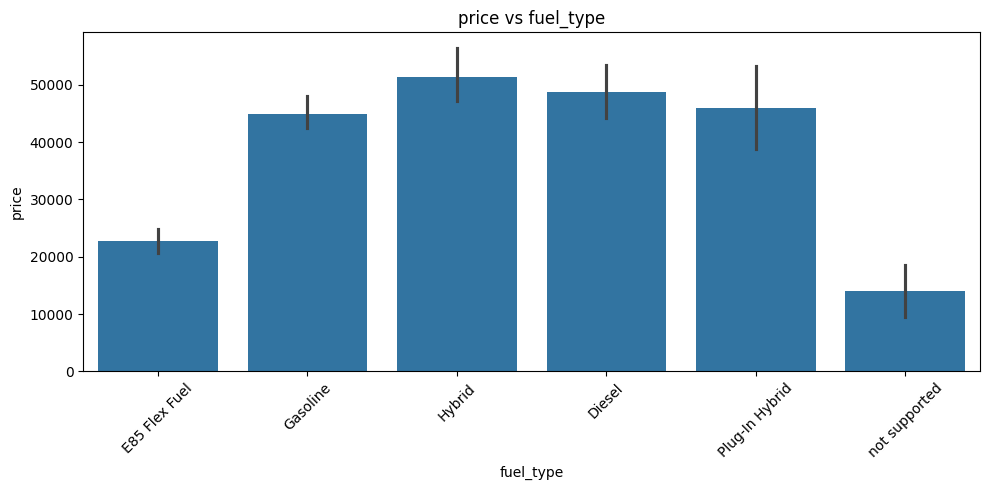

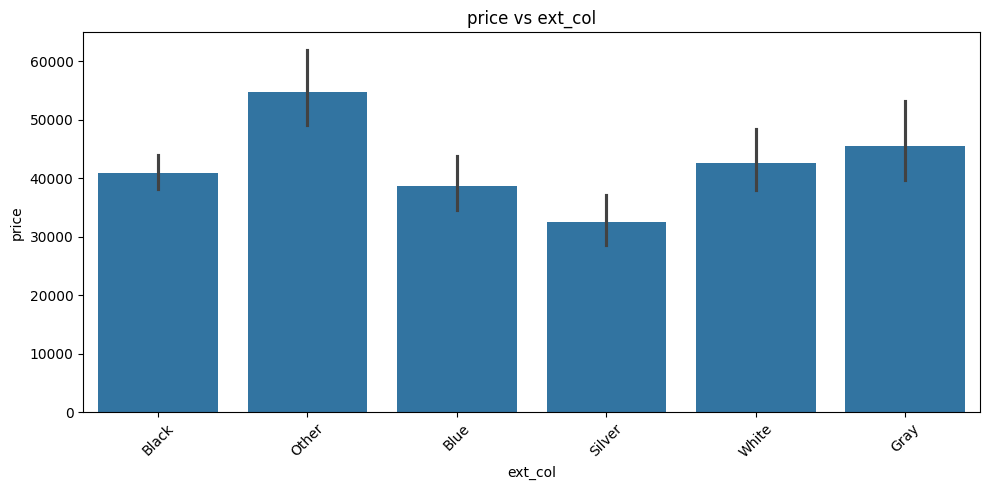

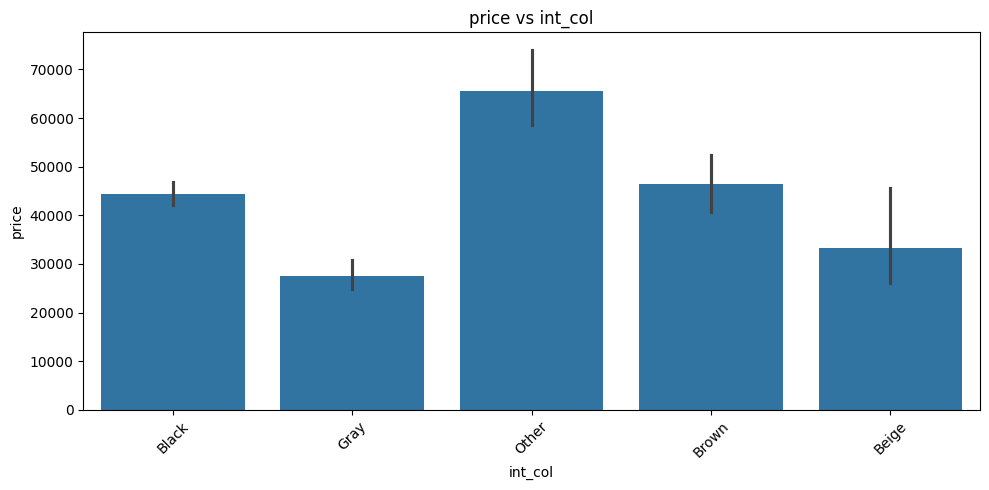

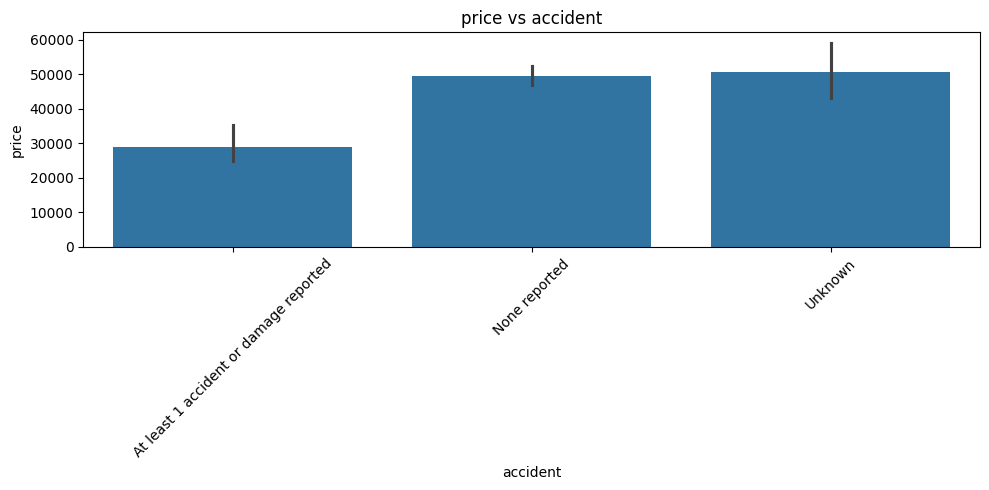

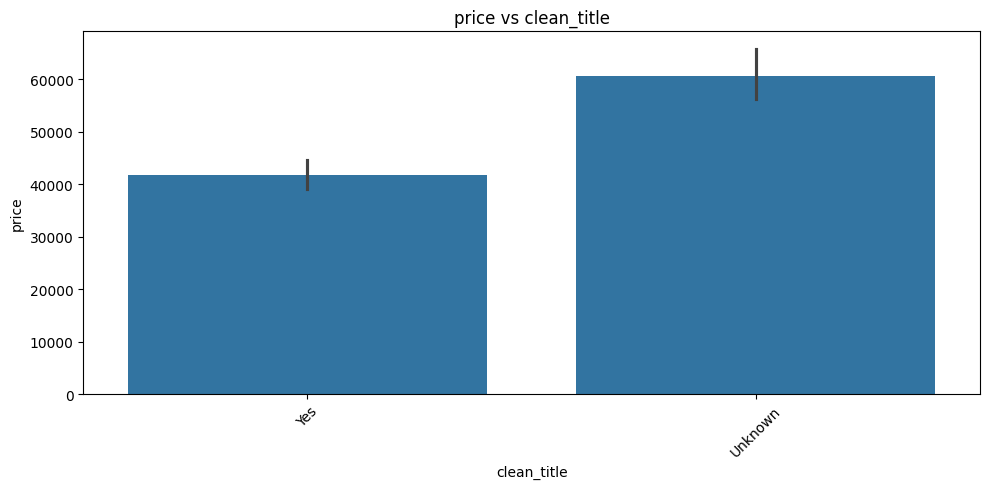

In [46]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=col, y='price')
    plt.title(f'price vs {col}')
    plt.xticks(rotation=45)
   # plt.ylim(0, 400000)
    plt.tight_layout()
    plt.show()

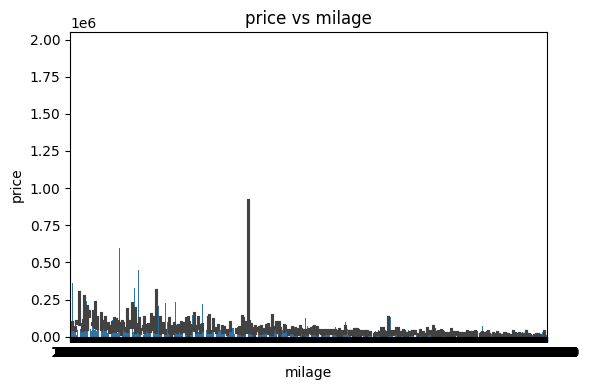

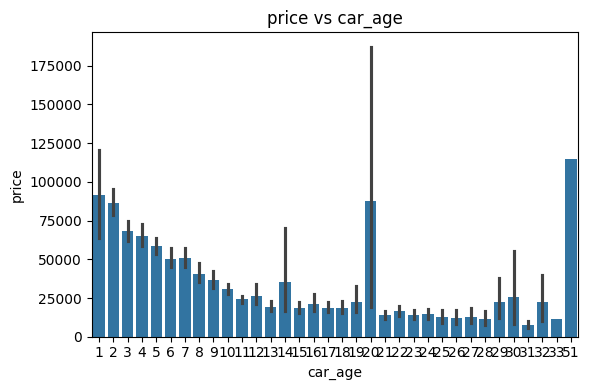

In [51]:
exclude_cols1 = ['engine_size','price']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols1]
# Plot bar plots of each feature vs Price
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, x=col, y='price')
    plt.title(f'price vs {col}')
    plt.tight_layout()
    plt.show()


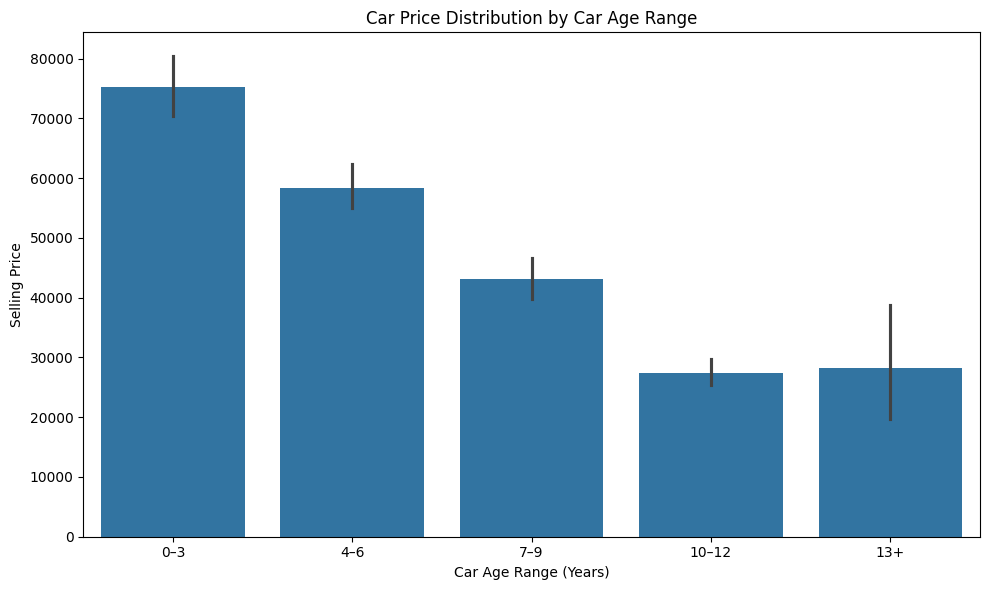

In [56]:
# Create car age bins
df['age_range'] = pd.cut(df['car_age'], bins=[0, 3, 6, 9, 12, 20], labels=['0–3', '4–6', '7–9', '10–12', '13+'])

# Bar plot: Price vs Age Range
plt.figure(figsize=(10, 6))
sns.barplot(x='age_range', y='price', data=df)
plt.title('Car Price Distribution by Car Age Range')
plt.xlabel('Car Age Range (Years)')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()


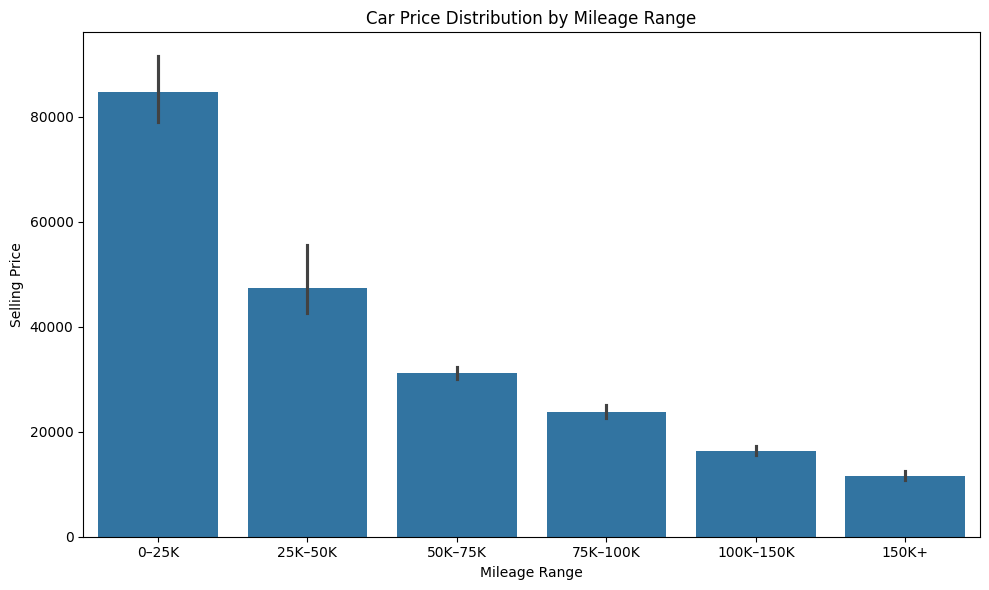

In [58]:
# Create mileage bins
df['milage_range'] = pd.cut(df['milage'], bins=[0, 25000, 50000, 75000, 100000, 150000, 300000],
                            labels=['0–25K', '25K–50K', '50K–75K', '75K–100K', '100K–150K', '150K+'])

# Bar plot: Price vs Mileage Range
plt.figure(figsize=(10, 6))
sns.barplot(x='milage_range', y='price', data=df)
plt.title('Car Price Distribution by Mileage Range')
plt.xlabel('Mileage Range')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()


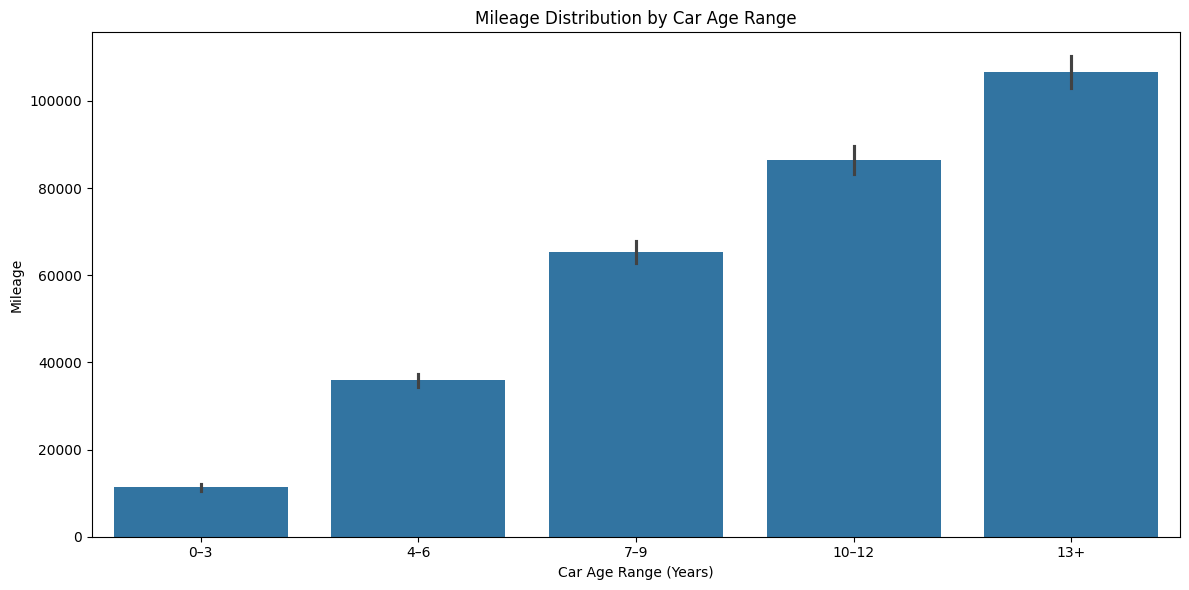

In [53]:

# Group car_age into bins (e.g., 0–3, 4–7, etc.)
df['age_range'] = pd.cut(df['car_age'], bins=[0, 3, 6, 9, 12, 20], labels=['0–3', '4–6', '7–9', '10–12', '13+'])

# Group milage into bins (optional, for further grouping or analysis)
df['milage_range'] = pd.cut(df['milage'], bins=[0, 25000, 50000, 75000, 100000, 150000, 300000],
                            labels=['0–25K', '25K–50K', '50K–75K', '75K–100K', '100K–150K', '150K+'])

# Create boxplot for mileage by car age range
plt.figure(figsize=(12, 6))
sns.barplot(x='age_range', y='milage', data=df)
plt.title('Mileage Distribution by Car Age Range')
plt.xlabel('Car Age Range (Years)')
plt.ylabel('Mileage')
plt.tight_layout()
plt.show()


C:\Users\mukund gupta\AppData\Local\Temp\ipykernel_7720\2090897902.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='age_range', columns='milage_range', values='price', aggfunc='mean')


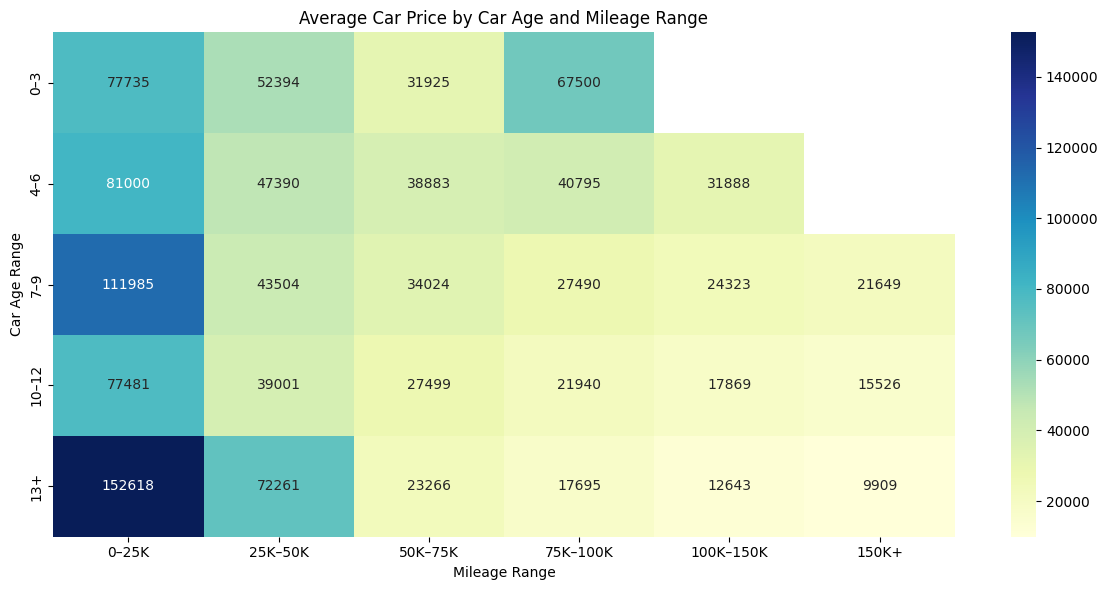

In [59]:
# Bin car_age and milage
df['age_range'] = pd.cut(df['car_age'], bins=[0, 3, 6, 9, 12, 20], labels=['0–3', '4–6', '7–9', '10–12', '13+'])
df['milage_range'] = pd.cut(df['milage'], bins=[0, 25000, 50000, 75000, 100000, 150000, 300000],
                            labels=['0–25K', '25K–50K', '50K–75K', '75K–100K', '100K–150K', '150K+'])

# Create pivot table
pivot_table = df.pivot_table(index='age_range', columns='milage_range', values='price', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Car Price by Car Age and Mileage Range')
plt.xlabel('Mileage Range')
plt.ylabel('Car Age Range')
plt.tight_layout()
plt.show()


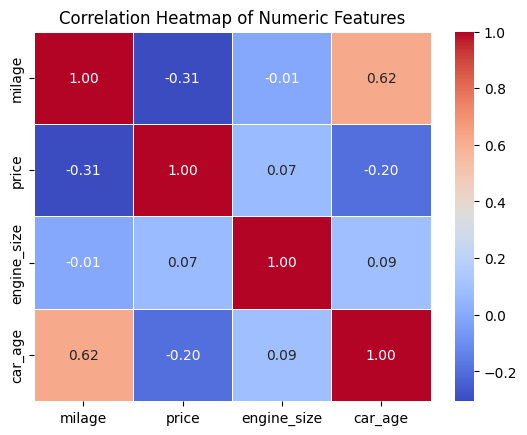

In [66]:
# Correlation Analysis
# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


C:\Users\mukund gupta\AppData\Local\Temp\ipykernel_7720\2455121588.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Brand_Model'] = df_filtered['brand'] + " - " + df_filtered['model']
C:\Users\mukund gupta\AppData\Local\Temp\ipykernel_7720\2455121588.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="viridis")


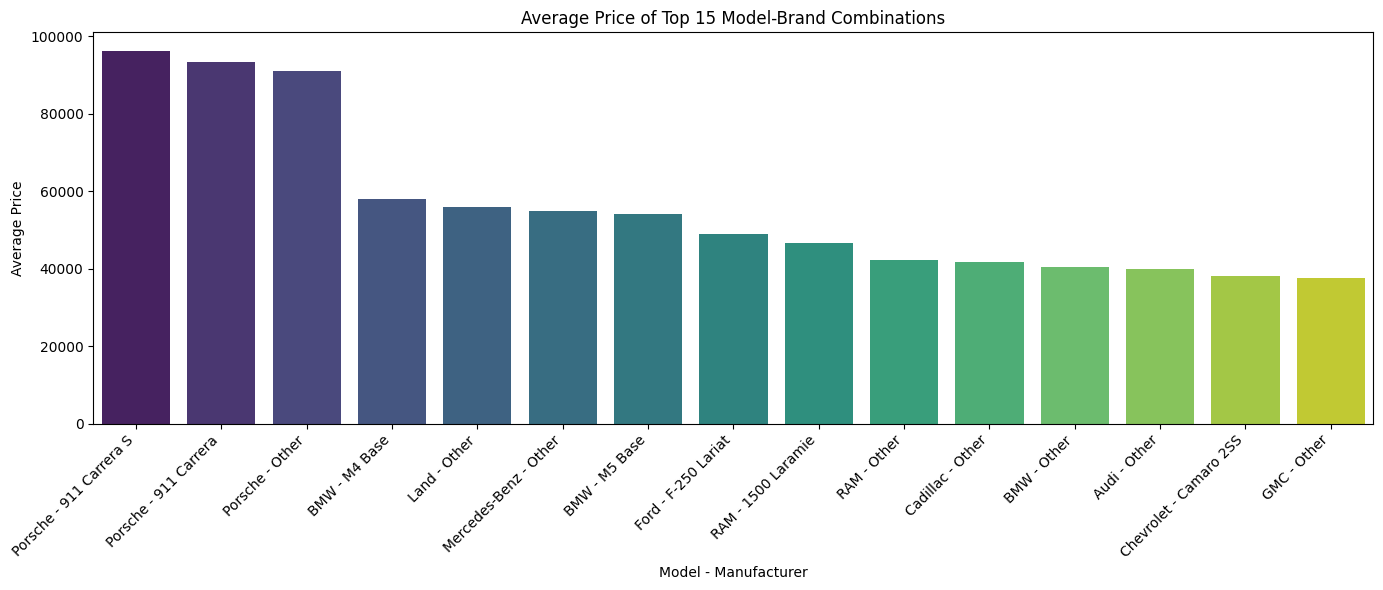

In [65]:

# Step 1: Filter top 15 brands
top_brands = df['brand'].value_counts().nlargest(15).index
df_top_brands = df[df['brand'].isin(top_brands)]

# Step 2: Filter top 15 models within those manufacturers
top_models = df_top_brands ['model'].value_counts().nlargest(15).index
df_filtered = df_top_brands [df_top_brands ['model'].isin(top_models)]

# Step 3: Create a combined label for clarity
df_filtered['Brand_Model'] = df_filtered['brand'] + " - " + df_filtered['model']

# Step 4: Calculate average price per Brand_Model
avg_prices = df_filtered.groupby('Brand_Model')['price'].mean().sort_values(ascending=False).head(15)

# Step 5: Plot as bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="viridis")
plt.title("Average Price of Top 15 Model-Brand Combinations")
plt.ylabel("Average Price")
plt.xlabel("Model - Manufacturer")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



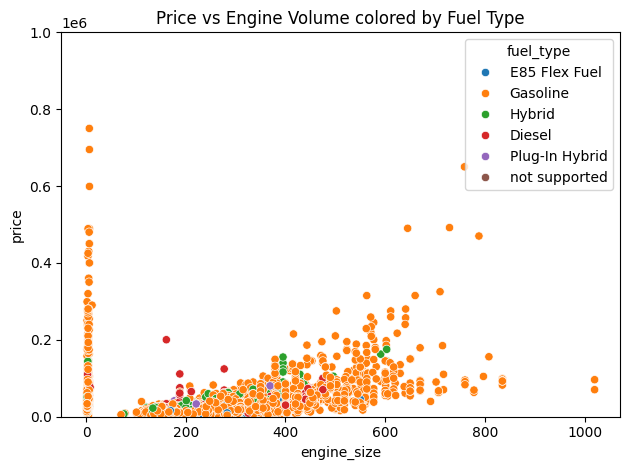

In [64]:
sns.scatterplot(data=df, x='engine_size', y='price', hue='fuel_type')
plt.title("Price vs Engine Volume colored by Fuel Type")
plt.ylim(0, 1000000)
plt.tight_layout()
plt.show()


In [61]:
# Correlation of all features with 'price'
price_corr = corr_matrix['price'].sort_values(ascending=False)
print(price_corr)


price          1.000000
engine_size    0.070837
car_age       -0.199496
milage        -0.305528
Name: price, dtype: float64


In [68]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"\n{col} Outliers:")
        print(f"  Total: {len(outliers)}")
        print(f"  Lower than {lower:.2f}: {df[df[col] < lower].shape[0]}")
        print(f"  Higher than {upper:.2f}: {df[df[col] > upper].shape[0]}")


In [69]:
columns_to_check = ['price', 'milage', 'engine_size', 'car_age']
detect_outliers_iqr(df, columns_to_check)


price Outliers:
  Total: 244
  Lower than -31985.00: 0
  Higher than 99175.00: 244

milage Outliers:
  Total: 69
  Lower than -83540.00: 0
  Higher than 200684.00: 69

engine_size Outliers:
  Total: 38
  Lower than -126.75: 0
  Higher than 687.25: 38

car_age Outliers:
  Total: 67
  Lower than -7.00: 0
  Higher than 25.00: 67


In [70]:
df.to_csv("cleaned_used.car_data.csv", index=False)